In [2]:
import requests  
import pandas as pd
from pyquery import PyQuery as pq  
import time  
import json
import re
from pymongo import MongoClient  
from urllib.parse import quote

In [3]:
headers = {  
'Host': 'm.weibo.cn',  
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',  
'X-Requested-With': 'XMLHttpRequest',  
}  
  
cookie={'Cookie':'_T_WM=43580185823; SUB=_2A25yuYEkDeRhGedG4loQ8y_JzjmIHXVuRS9srDV6PUJbktAKLVHmkW1NUOWLJm7TpRjvPK47kZJhJGYuKOB9uJeO;SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9WFLq'}
        
        

In [4]:
max_id=""
max_id_type=""
all_poid=[]
bo=True
alltext=[]

In [ ]:
while bo==True:
    if max_id=="" and max_id_type=="":
        url="https://m.weibo.cn/comments/hotflow?id=4572952227746524&mid=4572952227746524&max_id_type=0"
    else:
        url="https://m.weibo.cn/comments/hotflow?id=4572952227746524&mid=4572952227746524&max_id="+str(max_id)+"&max_id_type="+str(max_id_type)
    response=requests.get(url,headers=headers, cookies=cookie, verify=False)
    comment=response.json()
    if comment['ok']==0:
        break
    max_id=comment["data"]["max_id"]
    max_id_type=comment["data"]["max_id_type"]
    
    for comment_data in comment["data"]["data"]:
        
        p=re.compile(r'(<span.*>.*</span>)*(<a.*>.*</ a>)?')
        data=re.sub('[^\u4e00-\u9fa5]','',comment_data['text'])
        data=p.sub(r'',data)
        post_id=comment_data['id']
        
        if post_id in all_poid:
            bo=False
        
        elif len(data)!=0:
            all_poid.append(post_id)
            alltext.append(data)
               
       
    time.sleep(5)
    

In [149]:
from wordcloud import WordCloud
import jieba
import numpy as np


In [347]:
words=""

In [348]:
for w in alltext:
    word=jieba.cut(w)
    word=" ".join(word)
    words+=word
    

In [349]:
import matplotlib.pyplot as plt

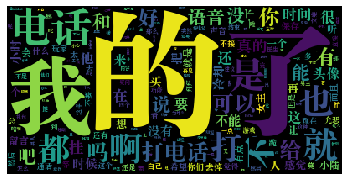

In [401]:
font="/system/library/fonts/Songti.ttc"
wc = WordCloud(collocations=False, font_path=font).generate(words)
plt.imshow(wc)
plt.axis("off")
plt.show()


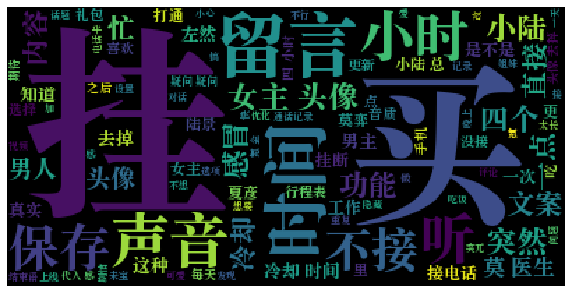

In [398]:
stopwords = [line.strip() for line in open('stopwords.txt', encoding="utf-8").readlines()] 
wc = WordCloud(collocations=True, font_path=font,stopwords=stopwords,max_font_size=150,max_words=100).generate(words)

plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()



In [400]:
import PIL.Image as Image
image=wc.to_image()
wc.to_file('weibocomment.png')